### Author: Aman Kumar
### Topic: Multiple Linear Regression
### Platform: upGrad
### we will predict the price of a house on the basis of some predictor variables, such as floor area, number of bedrooms, parking space, etc.

## Step 1 : Reading and understanding of data

In [1]:
# import all basics libraries for Linear Regression
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import statsmodels
import statsmodels.api as sm



In [2]:
df = pd.read_csv("E:\Housing.csv")

In [3]:
df.shape

(545, 13)

In [4]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
df.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


# Let us create some linear model to check their accuracy

<AxesSubplot:xlabel='price', ylabel='area'>

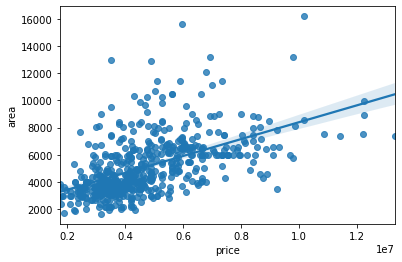

In [7]:
sns.regplot(x="price", y ="area", data=df) #Regression line and scatter plot

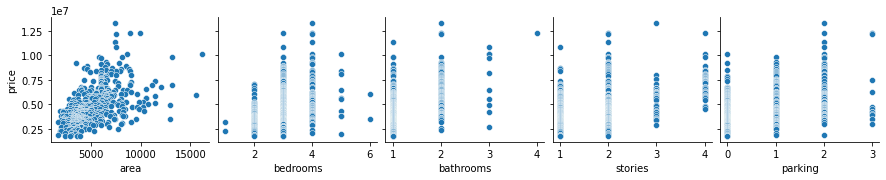

In [8]:
sns.pairplot(data=df, x_vars=["area","bedrooms","bathrooms","stories", "parking" ], y_vars ="price")  # Plot with numeric dATA

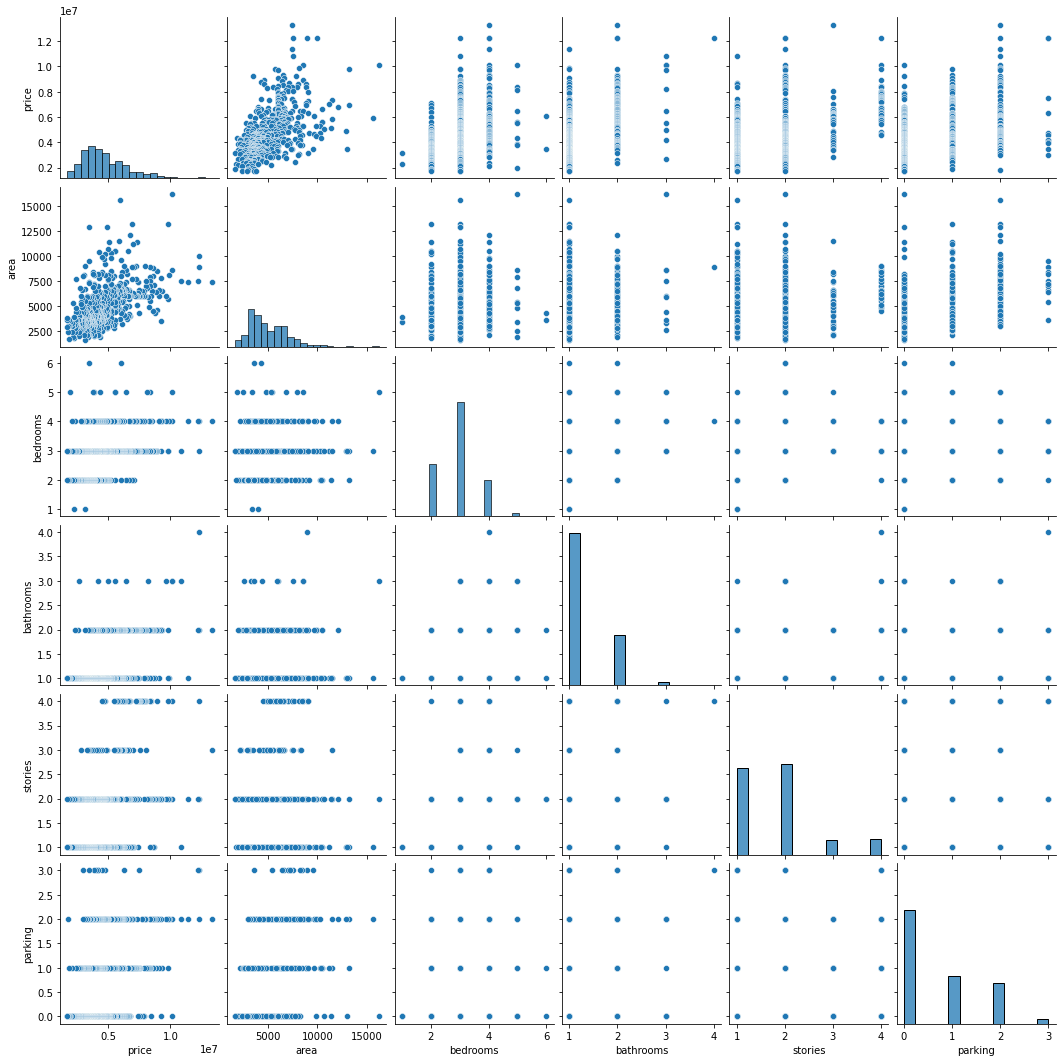

In [9]:
#these all for numeric variables
sns.pairplot(df)
plt.show()  #plot all together in all possible combinations

<AxesSubplot:xlabel='mainroad', ylabel='price'>

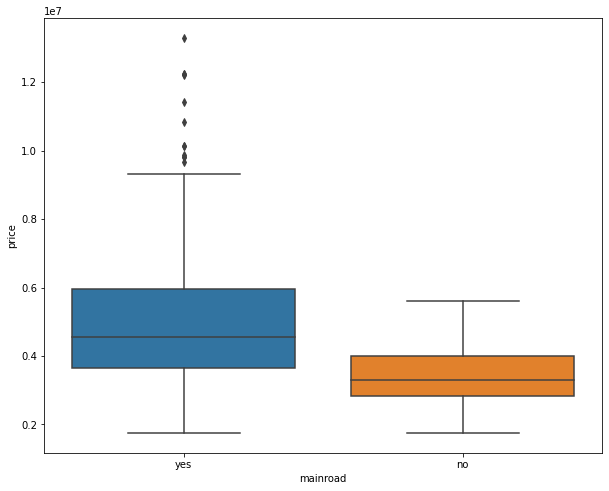

In [10]:
# now we willl visualize categorical also by boxplot
plt.figure(figsize=(10,8))
sns.boxplot(x="mainroad", y= "price", data=df)


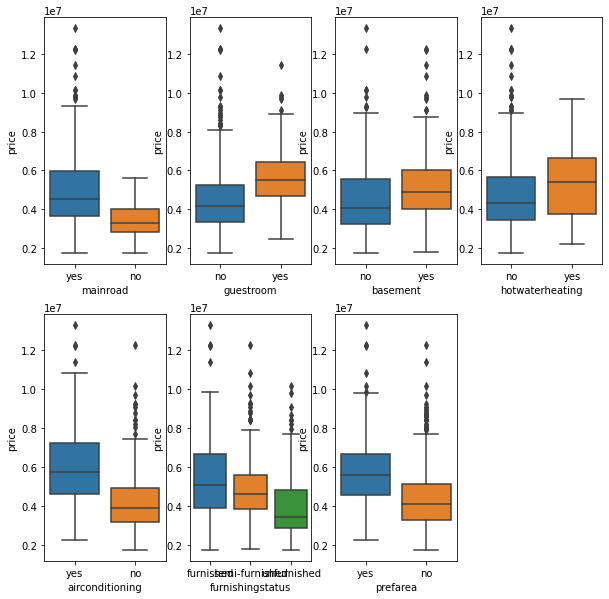

In [11]:
# now we willl visualize categorical all together
plt.figure(figsize=(10,10))
plt.subplot(2,4,1)
sns.boxplot(x="mainroad", y= "price", data=df)
plt.subplot(2,4,2)
sns.boxplot(x="guestroom", y= "price", data=df)
plt.subplot(2,4,3)
sns.boxplot(x="basement", y= "price", data=df)
plt.subplot(2,4,4)
sns.boxplot(x="hotwaterheating", y= "price", data=df)
plt.subplot(2,4,5)
sns.boxplot(x="airconditioning", y= "price", data=df)
plt.subplot(2,4,6)
sns.boxplot(x="furnishingstatus", y= "price", data=df)
plt.subplot(2,4,7)
sns.boxplot(x="prefarea", y= "price", data=df)
plt.show()




### Step2:  Preparing the Data for Modeling
- Encoding:

   - Convert binary vars to 1/0
   - Other categorical vars to dummy vars
- Spliting into train and test
- Rescaling of variables

In [12]:
# convert all categorical values into numeric values
df.mainroad.value_counts()

yes    468
no      77
Name: mainroad, dtype: int64

In [13]:
#yes/no variables
varlist=['mainroad','guestroom','basement','hotwaterheating','airconditioning','prefarea']
df[varlist]= df[varlist].apply(lambda x: x.map({"yes":1,"no":0}))
df[varlist].head()

,mainroad,guestroom,basement,hotwaterheating,airconditioning,prefarea
0,1,0,0,0,1,1
1,1,0,0,0,1,0
2,1,0,1,0,0,1
3,1,0,1,0,1,1
4,1,1,1,0,1,0


In [14]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished


# Dummy Variables

In [15]:
#creating a dummy variable for furnishingstauts
status = pd.get_dummies(df["furnishingstatus"])
status

,furnished,semi-furnished,unfurnished
0,1,0,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
540,0,0,1
541,0,1,0
542,0,0,1
543,1,0,0


convert and represnt

00 as furnished

01 as unurnished

10 as semifurnished

In [16]:
#creating a dummy variable for furnishingstauts
# dropping a redundant dummy var
status = pd.get_dummies(df["furnishingstatus"], drop_first =True)
status.head()

,semi-furnished,unfurnished
0,0,0
1,0,0
2,1,0
3,0,0
4,0,0


In [17]:
#concat the dummy df with original one
df = pd.concat([df,status], axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,furnished,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,furnished,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,semi-furnished,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,furnished,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,furnished,0,0


In [18]:
df=df.drop("furnishingstatus",axis=1)
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,0,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,0,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,1,0
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,0,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,0,0


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   price            545 non-null    int64
 1   area             545 non-null    int64
 2   bedrooms         545 non-null    int64
 3   bathrooms        545 non-null    int64
 4   stories          545 non-null    int64
 5   mainroad         545 non-null    int64
 6   guestroom        545 non-null    int64
 7   basement         545 non-null    int64
 8   hotwaterheating  545 non-null    int64
 9   airconditioning  545 non-null    int64
 10  parking          545 non-null    int64
 11  prefarea         545 non-null    int64
 12  semi-furnished   545 non-null    uint8
 13  unfurnished      545 non-null    uint8
dtypes: int64(12), uint8(2)
memory usage: 52.3 KB


In [20]:
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.858716,0.177982,0.350459,0.045872,0.315596,0.693578,0.234862,0.416514,0.326606
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.348635,0.382849,0.477552,0.209399,0.465180,0.861586,0.424302,0.493434,0.469402
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


In [21]:
from sklearn.model_selection import train_test_split
df_train, df_test=train_test_split(df,train_size=0.7,random_state=100)
print(df_train.shape)
print(df_test.shape)

(381, 14)
(164, 14)


Rescalling The features

In [22]:
# x
# normalisation : (x-xmin)/(xmax-xmin)
#standarisation: (x-xmean)/sigma

In [23]:
from sklearn.preprocessing import MinMaxScaler

In [24]:
# Create or instantise an object

scaler=MinMaxScaler()

# Create a list of numeric vars
num_vars = ["area","bedrooms","bathrooms","stories", 
            "parking","price"]

# fIT the data
#scaler.fit
df_train[num_vars]

,area,bedrooms,bathrooms,stories,parking,price
359,3600,3,1,1,1,3710000
19,6420,3,2,2,1,8855000
159,3150,3,2,1,0,5460000
35,7000,3,2,4,2,8080940
28,7950,5,2,2,2,8400000
...,...,...,...,...,...,...
526,3180,2,1,1,0,2310000
53,5150,3,2,4,2,7350000
350,3420,2,1,2,1,3780000
79,6000,3,2,3,0,6650000


In [25]:
#fit() :learn xmin,xmax
#transform(): x-xmin/xmax-xmin


#fit_transform(): combination of both

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
df_train.head()

<ipython-input-25-64e72386bf28>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_train[num_vars]=scaler.fit_transform(df_train[num_vars])
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [26]:
#fit() - training data set
#transform() - test dta set using 
#fit_transform()

In [27]:
df_train.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000,381.000000
mean,0.260333,0.288710,0.386352,0.136483,0.268591,0.855643,0.170604,0.351706,0.052493,0.299213,0.242345,0.233596,0.414698,0.325459
std,0.157607,0.181420,0.147336,0.237325,0.295001,0.351913,0.376657,0.478131,0.223313,0.458515,0.285933,0.423674,0.493318,0.469162
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.151515,0.155227,0.200000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.221212,0.234424,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.345455,0.398099,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Step3:  Training The Model

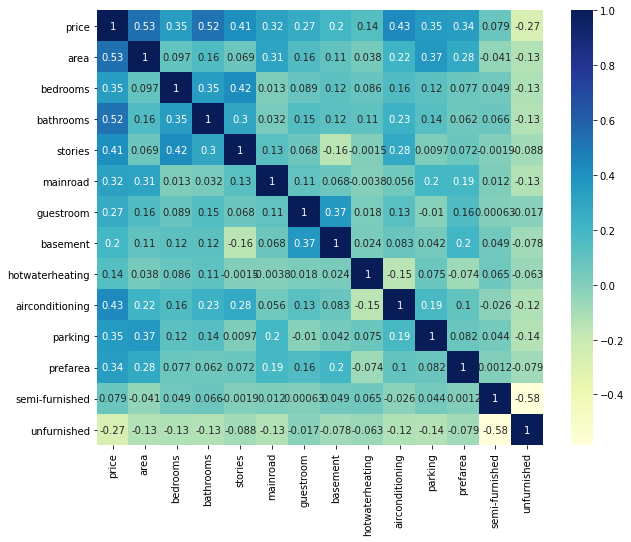

In [28]:
#heatmap
plt.figure(figsize=(10,8))
sns.heatmap(df_train.corr(), annot = True, cmap = "YlGnBu")
plt.show()

In [29]:
df_train.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.169697,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.615152,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.321212,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.548133,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.575758,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1


In [30]:
#x_train, y_train
y_train=df_train.pop("price")
x_train=df_train

- statistically significant of variable
- VIF

In [31]:
y_train

359    0.169697
19     0.615152
159    0.321212
35     0.548133
28     0.575758
         ...   
526    0.048485
53     0.484848
350    0.175758
79     0.424242
520    0.060606
Name: price, Length: 381, dtype: float64

In [32]:
x_train

,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
359,0.155227,0.4,0.0,0.000000,1,0,0,0,0,0.333333,0,0,1
19,0.403379,0.4,0.5,0.333333,1,0,0,0,1,0.333333,1,1,0
159,0.115628,0.4,0.5,0.000000,1,1,1,0,1,0.000000,0,0,0
35,0.454417,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,0,0
28,0.538015,0.8,0.5,0.333333,1,0,1,1,0,0.666667,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,0.118268,0.2,0.0,0.000000,1,0,0,0,0,0.000000,0,0,1
53,0.291623,0.4,0.5,1.000000,1,0,0,0,1,0.666667,0,1,0
350,0.139388,0.2,0.0,0.333333,1,0,0,1,0,0.333333,0,1,0
79,0.366420,0.4,0.5,0.666667,1,1,0,0,1,0.000000,0,0,0


In [33]:
# add a constant
x_train_sm = sm.add_constant(x_train["area"])

# create first model

lr = sm.OLS( y_train, x_train_sm)

#fit
lr_model=lr.fit()

#params
lr_model.params

const    0.126894
area     0.462192
dtype: float64

In [34]:
y_train.shape

(381,)

In [35]:
x_train_sm.shape

(381, 2)

In [36]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.283
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     149.6
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           3.15e-29
Time:                        00:58:59   Log-Likelihood:                 227.23
No. Observations:                 381   AIC:                            -450.5
Df Residuals:                     379   BIC:                            -442.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1269      0.013      9.853      0.000       0.102       0.152
area           0.4622      0.038     12.232      0.000       0.388       0.536
==============================================================================
Omnibus:                       67.313   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.063
Skew:                           0.925   Prob(JB):                     8.59e-32
Kurtosis:                       5.365   Cond. No.                         5.99
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
#add another variable bathroom

x_train_sm=x_train[['area','bathrooms']]
x_train_sm=sm.add_constant(x_train_sm)

#create model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model=lr.fit()

#params

lr_model.params

const        0.104589
area         0.398396
bathrooms    0.298374
dtype: float64

In [38]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.477
Method:                 Least Squares   F-statistic:                     174.1
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           2.51e-54
Time:                        00:58:59   Log-Likelihood:                 288.24
No. Observations:                 381   AIC:                            -570.5
Df Residuals:                     378   BIC:                            -558.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1046      0.011      9.384      0.000       0.083       0.127
area           0.3984      0.033     12.192      0.000       0.334       0.463
bathrooms      0.2984      0.025     11.945      0.000       0.249       0.347
==============================================================================
Omnibus:                       62.839   Durbin-Watson:                   2.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              168.790
Skew:                           0.784   Prob(JB):                     2.23e-37
Kurtosis:                       5.859   Cond. No.                         6.17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [39]:
#add another variable bedrooms

x_train_sm=x_train[['area','bathrooms', "bedrooms"]]
x_train_sm=sm.add_constant(x_train_sm)

#create model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model=lr.fit()

#params

print(lr_model.params)

#summary

lr_model.summary()

const        0.041352
area         0.392211
bathrooms    0.259978
bedrooms     0.181863
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.505
Model:                            OLS   Adj. R-squared:                  0.501
Method:                 Least Squares   F-statistic:                     128.2
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           3.12e-57
Time:                        00:58:59   Log-Likelihood:                 297.76
No. Observations:                 381   AIC:                            -587.5
Df Residuals:                     377   BIC:                            -571.7
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0414      0.018      2.292      0.022       0.006       0.077
area           0.3922      0.032     12.279      0.000       0.329       0.455
bathrooms      0.2600      0.026     10.033      0.000       0.209       0.311
bedrooms       0.1819      0.041      4.396      0.000       0.101       0.263
==============================================================================
Omnibus:                       50.037   Durbin-Watson:                   2.136
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              124.806
Skew:                           0.648   Prob(JB):                     7.92e-28
Kurtosis:                       5.487   Cond. No.                         8.87
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Add all the variables to the model

In [40]:
df.columns # how many columns we have in our data set

Index(['price', 'area', 'bedrooms', 'bathrooms', 'stories', 'mainroad',
       'guestroom', 'basement', 'hotwaterheating', 'airconditioning',
       'parking', 'prefarea', 'semi-furnished', 'unfurnished'],
      dtype='object')

In [41]:
#build a model with all variables

x_train_sm=sm.add_constant(x_train)

#create model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model=lr.fit()

#params

print(lr_model.params)

#summary

lr_model.summary()

const              0.020033
area               0.234664
bedrooms           0.046735
bathrooms          0.190823
stories            0.108516
mainroad           0.050441
guestroom          0.030428
basement           0.021595
hotwaterheating    0.084863
airconditioning    0.066881
parking            0.060735
prefarea           0.059428
semi-furnished     0.000921
unfurnished       -0.031006
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           8.83e-83
Time:                        00:58:59   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0200      0.021      0.955      0.340      -0.021       0.061
area                0.2347      0.030      7.795      0.000       0.175       0.294
bedrooms            0.0467      0.037      1.267      0.206      -0.026       0.119
bathrooms           0.1908      0.022      8.679      0.000       0.148       0.234
stories             0.1085      0.019      5.661      0.000       0.071       0.146
mainroad            0.0504      0.014      3.520      0.000       0.022       0.079
guestroom           0.0304      0.014      2.233      0.026       0.004       0.057
basement            0.0216      0.011      1.943      0.053      -0.000       0.043
hotwaterheating     0.0849      0.022      3.934      0.000       0.042       0.127
airconditioning     0.0669      0.011      5.899      0.000       0.045       0.089
parking             0.0607      0.018      3.365      0.001       0.025       0.096
prefarea            0.0594      0.012      5.040      0.000       0.036       0.083
semi-furnished      0.0009      0.012      0.078      0.938      -0.022       0.024
unfurnished        -0.0310      0.013     -2.440      0.015      -0.056      -0.006
==============================================================================
Omnibus:                       93.687   Durbin-Watson:                   2.093
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              304.917
Skew:                           1.091   Prob(JB):                     6.14e-67
Kurtosis:                       6.801   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
# we need to remove high p value variable
# significance(p-values)
# VIF


### VIF

VIF_i = 1/(1- (R_i)^2)


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [44]:
vif = pd.DataFrame()

vif["Features"] = x_train.columns
vif["VIF"]=[ variance_inflation_factor(x_train.values,i)for i in range(x_train.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,bedrooms,7.33
4,mainroad,6.02
0,area,4.67
3,stories,2.70
11,semi-furnished,2.19
9,parking,2.12
6,basement,2.02
12,unfurnished,1.82
8,airconditioning,1.77
2,bathrooms,1.67


### we could have:
- high p-value, high vif
- High-low:
   - High p, low VIF
   - Low p, High VIF
- Low p, Low VIF

In [45]:
x= x_train.drop("semi-furnished", axis=1)

In [46]:
# create another model
x_train_sm=sm.add_constant(x)

#create model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model=lr.fit()

#params

print(lr_model.params)

#summary

lr_model.summary()

const              0.020740
area               0.234404
bedrooms           0.046710
bathrooms          0.190876
stories            0.108475
mainroad           0.050401
guestroom          0.030447
basement           0.021605
hotwaterheating    0.084890
airconditioning    0.066803
parking            0.060761
prefarea           0.059419
unfurnished       -0.031594
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     65.61
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           1.07e-83
Time:                        00:58:59   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -737.6
Df Residuals:                     368   BIC:                            -686.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0207      0.019      1.098      0.273      -0.016       0.058
area                0.2344      0.030      7.845      0.000       0.176       0.293
bedrooms            0.0467      0.037      1.268      0.206      -0.026       0.119
bathrooms           0.1909      0.022      8.697      0.000       0.148       0.234
stories             0.1085      0.019      5.669      0.000       0.071       0.146
mainroad            0.0504      0.014      3.524      0.000       0.022       0.079
guestroom           0.0304      0.014      2.238      0.026       0.004       0.057
basement            0.0216      0.011      1.946      0.052      -0.000       0.043
hotwaterheating     0.0849      0.022      3.941      0.000       0.043       0.127
airconditioning     0.0668      0.011      5.923      0.000       0.045       0.089
parking             0.0608      0.018      3.372      0.001       0.025       0.096
prefarea            0.0594      0.012      5.046      0.000       0.036       0.083
unfurnished        -0.0316      0.010     -3.096      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       93.538   Durbin-Watson:                   2.092
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              303.844
Skew:                           1.090   Prob(JB):                     1.05e-66
Kurtosis:                       6.794   Cond. No.                         14.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif = pd.DataFrame()

vif["Features"] = x.columns
vif["VIF"]=[ variance_inflation_factor(x.values,i)for i in range(x.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
1,bedrooms,6.59
4,mainroad,5.68
0,area,4.67
3,stories,2.69
9,parking,2.12
6,basement,2.01
8,airconditioning,1.77
2,bathrooms,1.67
10,prefarea,1.51
5,guestroom,1.47


In [48]:
X= x.drop("bedrooms", axis=1)

# create another model
x_train_sm=sm.add_constant(X)

#create model
lr = sm.OLS(y_train, x_train_sm)

#fit
lr_model=lr.fit()

#params

print(lr_model.params)

#summary

lr_model.summary()

const              0.035722
area               0.234746
bathrooms          0.196480
stories            0.117751
mainroad           0.048798
guestroom          0.030097
basement           0.023917
hotwaterheating    0.086403
airconditioning    0.066533
parking            0.062872
prefarea           0.059643
unfurnished       -0.032317
dtype: float64


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.680
Model:                            OLS   Adj. R-squared:                  0.671
Method:                 Least Squares   F-statistic:                     71.31
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           2.73e-84
Time:                        00:58:59   Log-Likelihood:                 380.96
No. Observations:                 381   AIC:                            -737.9
Df Residuals:                     369   BIC:                            -690.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0357      0.015      2.421      0.016       0.007       0.065
area                0.2347      0.030      7.851      0.000       0.176       0.294
bathrooms           0.1965      0.022      9.132      0.000       0.154       0.239
stories             0.1178      0.018      6.654      0.000       0.083       0.153
mainroad            0.0488      0.014      3.423      0.001       0.021       0.077
guestroom           0.0301      0.014      2.211      0.028       0.003       0.057
basement            0.0239      0.011      2.183      0.030       0.002       0.045
hotwaterheating     0.0864      0.022      4.014      0.000       0.044       0.129
airconditioning     0.0665      0.011      5.895      0.000       0.044       0.089
parking             0.0629      0.018      3.501      0.001       0.028       0.098
prefarea            0.0596      0.012      5.061      0.000       0.036       0.083
unfurnished        -0.0323      0.010     -3.169      0.002      -0.052      -0.012
==============================================================================
Omnibus:                       97.661   Durbin-Watson:                   2.097
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              325.388
Skew:                           1.130   Prob(JB):                     2.20e-71
Kurtosis:                       6.923   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [49]:
vif = pd.DataFrame()

vif["Features"] = X.columns
vif["VIF"]=[ variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
3,mainroad,4.79
0,area,4.55
2,stories,2.23
8,parking,2.10
5,basement,1.87
7,airconditioning,1.76
1,bathrooms,1.61
9,prefarea,1.50
4,guestroom,1.46
10,unfurnished,1.33


### Residual Analysis and Predictions

Before making the predictions, you need to be certain that the model is reliable. To that end, you need to first perform a residual analysis of the error terms and then move on to making the predictions on the test set; and finally, evaluate the model based on the predictions.

# Step-4: Residual Analysis

In [50]:
y_train_pred=lr_model.predict(x_train_sm)
y_train_pred

359    0.109599
19     0.463835
159    0.330450
35     0.515631
28     0.468225
         ...   
526    0.079966
53     0.477416
350    0.263852
79     0.443907
520    0.173336
Length: 381, dtype: float64

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

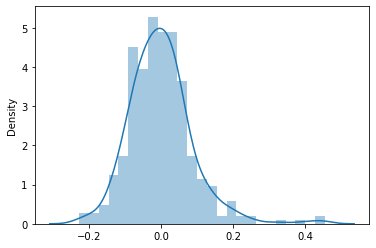

In [51]:
res = y_train - y_train_pred
sns.distplot(res)

### Now that the model building is done, let’s go ahead and make inferences on the model.

Step-5: Predictions and Evaluation  on test set

In [52]:
num_vars = ["area","bedrooms","bathrooms","stories", 
            "parking","price"]
df_test[num_vars]=scaler.transform(df_test[num_vars])
df_test.head()

<ipython-input-52-31a633e72f48>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test[num_vars]=scaler.transform(df_test[num_vars])
C:\Users\Dell\anaconda3\lib\site-packages\pandas\core\indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,0.229697,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,0.484848,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,0.303030,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,0.242424,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,0.227879,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [53]:
df_test.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
count,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000,164.000000
mean,0.263176,0.298548,0.408537,0.158537,0.268293,0.865854,0.195122,0.347561,0.030488,0.353659,0.205285,0.237805,0.420732,0.329268
std,0.172077,0.211922,0.147537,0.281081,0.276007,0.341853,0.397508,0.477654,0.172452,0.479569,0.289322,0.427043,0.495189,0.471387
min,0.006061,-0.016367,0.200000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.142424,0.148011,0.400000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.226061,0.259724,0.400000,0.000000,0.333333,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.346970,0.397439,0.400000,0.500000,0.333333,1.000000,0.000000,1.000000,0.000000,1.000000,0.333333,0.000000,1.000000,1.000000
max,0.909091,1.263992,0.800000,1.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [54]:
y_test = df_test.pop("price")
x_test=df_test

In [55]:
x_test_sm = sm.add_constant(x_test)
x_test_sm.head()

,const,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,semi-furnished,unfurnished
265,1.0,0.091869,0.4,0.0,0.333333,1,0,0,0,0,0.000000,1,1,0
54,1.0,0.366420,0.4,0.5,0.333333,1,1,0,0,1,0.333333,0,1,0
171,1.0,0.742080,0.4,0.0,0.000000,1,0,0,0,0,0.333333,1,1,0
244,1.0,0.306582,0.4,0.0,0.333333,1,1,1,0,0,0.000000,1,1,0
268,1.0,0.274023,0.6,0.0,0.333333,1,0,0,0,1,0.000000,0,1,0


In [56]:
x_test_sm=x_test_sm.drop(["bedrooms","semi-furnished"], axis=1)

In [57]:
# predict

y_test_pred=lr_model.predict(x_test_sm)

In [58]:
#evalute the model

from sklearn.metrics import r2_score

In [59]:
r2= r2_score(y_true = y_test, y_pred= y_test_pred)
r2

0.6713505684480789

 eqution: 
 
 price = 0.236 * area + 0.202*bathrooms + 0.11*stories + 0.05*mainroad + 0.04*guestroom + 0.0876*hotwaterheating + 0.0682*airconditioning + 0.0637*prefrea - 0.0337* unfurnished

We can have a decent model, but we also acknowledge that we could do better.

we have a couple of options:

- 1 . Add new features
- 2. Build a non linear model

# RFE Method of Model Building

In [60]:
#initial steps are same 

In [61]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [62]:
lm = LinearRegression()
lm.fit(x_train, y_train)
rfe = RFE(lm,10) # 10 is number of featurs youn want
rfe = rfe.fit(x_train, y_train)

C:\Users\Dell\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass n_features_to_select=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [63]:
list(zip(x_train.columns, rfe.support_, rfe.ranking_))

[('area', True, 1),
 ('bedrooms', True, 1),
 ('bathrooms', True, 1),
 ('stories', True, 1),
 ('mainroad', True, 1),
 ('guestroom', True, 1),
 ('basement', False, 3),
 ('hotwaterheating', True, 1),
 ('airconditioning', True, 1),
 ('parking', True, 1),
 ('prefarea', True, 1),
 ('semi-furnished', False, 4),
 ('unfurnished', False, 2)]

In [64]:
col = x_train.columns[rfe.support_]
col

Index(['area', 'bedrooms', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [65]:
x_train.columns[~rfe.support_]

Index(['basement', 'semi-furnished', 'unfurnished'], dtype='object')

# Building Model using statsmodel, for the detailed statistics

In [66]:
# creating x_test dataframe with RFE selected variables
x_train_rfe = x_train[col]

In [67]:
import statsmodels.api as sns
x_train_rfe = sm.add_constant(x_train_rfe)

In [68]:
lm =sm.OLS(y_train, x_train_rfe).fit()

In [69]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.660
Method:                 Least Squares   F-statistic:                     74.89
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           1.28e-82
Time:                        00:59:00   Log-Likelihood:                 374.65
No. Observations:                 381   AIC:                            -727.3
Df Residuals:                     370   BIC:                            -683.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0027      0.018     

In [70]:
x_train_now = x_train_rfe.drop(["bedrooms"], axis=1)

In [71]:
import statsmodels.api as sns
x_train_lm = sm.add_constant(x_train_now)

In [72]:
lm =sm.OLS(y_train, x_train_lm).fit()

In [73]:
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.666
Model:                            OLS   Adj. R-squared:                  0.658
Method:                 Least Squares   F-statistic:                     82.37
Date:                Thu, 12 Aug 2021   Prob (F-statistic):           6.67e-83
Time:                        00:59:00   Log-Likelihood:                 373.00
No. Observations:                 381   AIC:                            -726.0
Df Residuals:                     371   BIC:                            -686.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0242      0.013     

In [74]:
x_train_now.columns

Index(['const', 'area', 'bathrooms', 'stories', 'mainroad', 'guestroom',
       'hotwaterheating', 'airconditioning', 'parking', 'prefarea'],
      dtype='object')

In [75]:
x_train_now = x_train_now.drop(["const"], axis=1)

In [76]:
vif = pd.DataFrame()
X = x_train_now
vif["Features"] = X.columns
vif["VIF"]=[ variance_inflation_factor(X.values,i)for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"],2)
vif = vif.sort_values(by = 'VIF', ascending = False)
vif

,Features,VIF
0,area,4.52
3,mainroad,4.26
2,stories,2.12
7,parking,2.10
6,airconditioning,1.75
1,bathrooms,1.58
8,prefarea,1.47
4,guestroom,1.30
5,hotwaterheating,1.12


## Step : Residual Analysis and prediction power

In [77]:
y_train_price = lm.predict(x_train_lm)

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Errors')

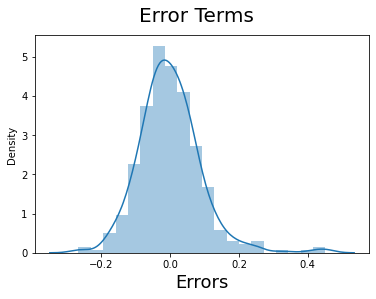

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
fig= plt.figure()
sns.distplot((y_train - y_train_price), bins=20)
fig.suptitle("Error Terms", fontsize = 20)
plt.xlabel("Errors", fontsize = 18)